In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from matplotlib.pyplot import figure
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import SmoothBivariateSpline
import csv

In [ ]:
"""#Produces input array of coordinates,
lats = np.linspace(0,100000,1)
fields = ["Latitude","Longitude"]
pts = 1e4
longs = np.linspace(np.min(Long),np.max(Long),np.sqrt(pts))
lats = np.linspace(np.min(Lat),np.max(Lat),np.sqrt(pts))

rows = [[lats[0],longs[0]]]
for i in np.arange(1,100,1): 
    for j in np.arange(1,100,1):
        rows.append([lats[i],longs[j]])

filename = "Colca_Valley_Longs_and_Lats.csv"

fields = ["Latitudes","Longitudes"]

print(rows)

with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
          
    # writing the fields  
    csvwriter.writerow(fields)  
          
    # writing the data rows  
    csvwriter.writerows(rows)"""

In [4]:
f = open('/Users/pavelzhelnin/Documents/physics/TAMBO/ColcaValleyData.txt', 'r')
content = f.read()


In [5]:
df = pd.read_csv('/Users/pavelzhelnin/Documents/physics/TAMBO/ColcaValleyData.txt', delimiter = "\t") 
print(df)

     type   latitude  longitude  altitude (m)                         name
0       T -15.739750 -72.336237        3905.0  Colca_Valley_Longs_and_Lats
1       T -15.736416 -72.332200        3779.1                          NaN
2       T -15.736416 -72.328163        3816.0                          NaN
3       T -15.736416 -72.324127        3856.3                          NaN
4       T -15.736416 -72.320090        3876.8                          NaN
...   ...        ...        ...           ...                          ...
9797    T -15.409632 -71.952750        4762.4                          NaN
9798    T -15.409632 -71.948713        4909.1                          NaN
9799    T -15.409632 -71.944676        4984.2                          NaN
9800    T -15.409632 -71.940640        4958.5                          NaN
9801    T -15.409632 -71.936603        5024.4                          NaN

[9802 rows x 5 columns]


In [195]:
Lat = df.iloc[0:, 1]
Long = df.iloc[0:, 2]
Elev = df.iloc[0:, 3]
print(len(Long))
print(len(Elev))
pts=1000000
longs= np.arange(np.min(Long),np.max(Long),(-np.min(Long)+np.max(Long))/np.sqrt(pts))
lats = np.arange(np.min(Lat),np.max(Lat),(-np.min(Lat)+np.max(Lat))/np.sqrt(pts))
elevs = np.arange(np.min(Elev),np.max(Elev),(-np.min(Elev)+np.max(Elev))/np.sqrt(pts))
x,y = np.meshgrid(longs,lats);
z = griddata((Long, Lat), Elev, (x, y), method='cubic');
#print(z)
x = np.matrix.flatten(np.asmatrix(x)); #Gridded longitude
y = np.matrix.flatten(np.asmatrix(y)); #Gridded latitude
z = np.matrix.flatten(np.asmatrix(z)); #Gridded elevation

print(np.min(Long),np.max(Long),np.min(Lat),np.max(Lat))

print(len(y))
print(len(longs))
print(y)

9802
9802
-72.336236836 -71.936602802 -15.739750048 -15.409631924
1
1000
[[-15.73975005 -15.73975005 -15.73975005 ... -15.40996204 -15.40996204
  -15.40996204]]


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1, 1000000)

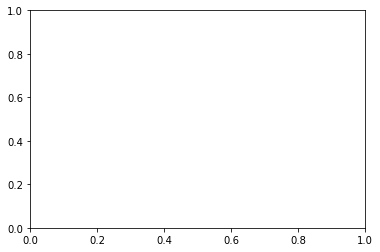

In [128]:
print(x)
    

In [459]:
print(len(longs))
print(len(lats))
print(len(elevs))
elevations = SmoothBivariateSpline(Long,Lat,Elev,kx=3,ky=3)

1000
1000
1001


In [23]:
#print(np.min(Long),np.max(Long))
#e = SmoothBivariateSpline(Long,Lat,Elev,kx=3,ky=3)
#g = np.arange(0,1000,1)
#print(g)
#print(d.ev(Long[0],Lat))
#gg = np.linspace(-15.7397,-15.4096,1000)
#print(longs[500])

for zz in np.arange(0,9000,1000):
    #plt.plot(Lat,d.ev(Long[zz],Lat))
    print(Long[zz])
    #plt.scatter[Lat,Elev[zz]]
    #plt.show()

#plt.plot(lats,d.ev(longs[500],lats))
#plt.plot(longs,e.ev(longs,lats[500]))
#print(d.ev(longs,lats))

#plt.scatter([x],[y],1,d.ev(x,y),cmap = 'terrain')








-72.336236836
-72.295869762
-72.255502688
-72.215135614
-72.174768539
-72.134401465
-72.094034391
-72.053667317
-72.013300243


/Users/pavelzhelnin/anaconda3/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:1168: UserWarning: 
The required storage space exceeds the available storage space: nxest
or nyest too small, or s too small.
The weighted least-squares spline corresponds to the current set of
knots.
  warnings.warn(message)


ValueError: slice step cannot be zero

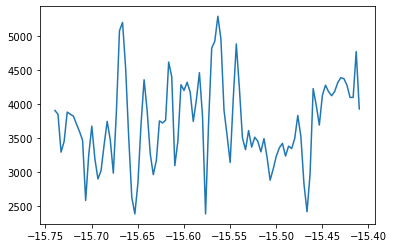

In [132]:
for zz in np.arange(0,9000,500):
    plt.plot(Lat,d.ev(Long[zz],Lat))
    plt.plot(y,z[::zz])
    plt.show()
    #print(Long[zz])

In [17]:
spl = UnivariateSpline(longs,elevs)
xs = np.linspace(-72.336,-71.936, 10000)
plt.plot(xs,spl(xs),'b', lw=3)
plt.show()


ValueError: x and y should have a same length

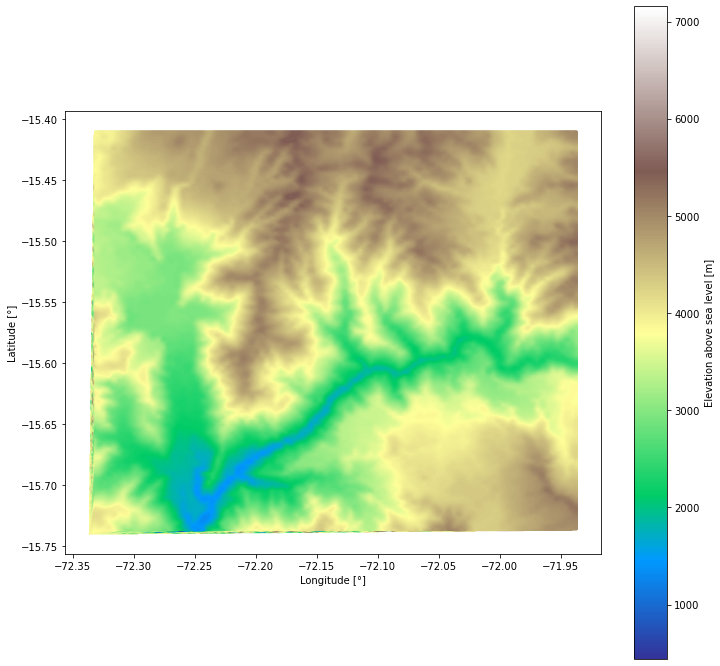

In [258]:
plt.scatter([x],[y],1,[z],cmap = 'terrain')
plt.colorbar(label='Elevation above sea level [m]')
plt.xlabel(u'Longitude [°]')
plt.ylabel(u'Latitude [°]')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(12, 12)

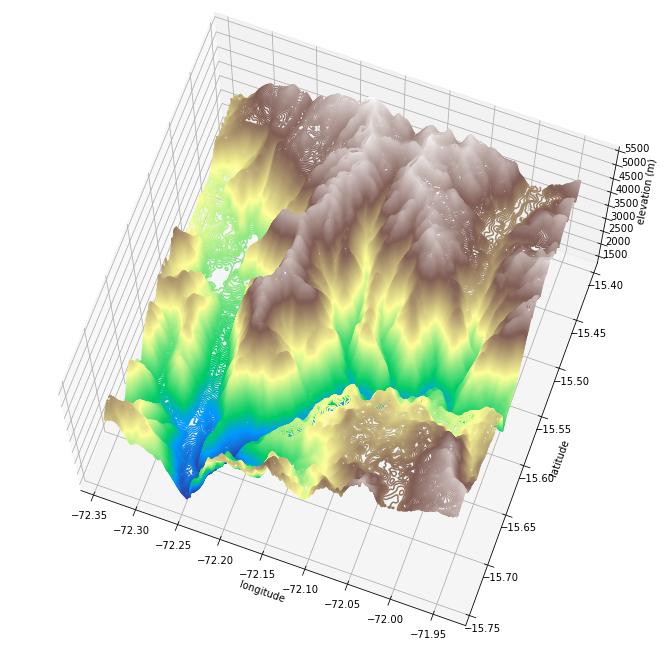

In [257]:
from matplotlib import figure
#fig = plt.figure(figsize=(3,3))

ax = plt.axes(projection='3d')
x,y = np.meshgrid(longs,lats);
g = griddata((Long, Lat), Elev, (x, y), method='cubic');
g_del = np.delete(g,np.s_[1:11],1);
g_gel = np.delete(g_del,np.s_[990:1000],1);
y_del = np.delete(y,np.s_[990:1000],1);
x_del = np.delete(x,np.s_[990:1000],1);
#print(g)
ax.contour3D(x_del[10:990],y_del[10:990],g_del[10:990], 400, cmap='terrain')
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.set_zlabel("elevation (m)")
ax.view_init(70, 290)

plt.gcf().set_size_inches(12, 12)
#plt.savefig("ContourColcaFromAbove", bbox_inches='tight')
    

In [186]:
x,y = np.meshgrid(longs,lats);
g = griddata((Long, Lat), Elev, (x, y), method='cubic');
g_del = np.delete(g,0,1)


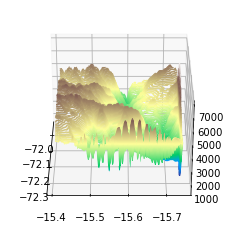

In [199]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x,y = np.meshgrid(longs,lats);
g = griddata((Long, Lat), Elev, (x, y), method='cubic');
ax.contour3D(x,y,g, 100, cmap='terrain')
ax.view_init(30, 180)
plt.show()

In [ ]:
#Build something that defines rock and something that defines air 
#Define a trajectory through which you go through the geometry that you have 
#Have something that tells you if it is in rock or in air 
#Have a thing that defines a path/track and knows what objects are in that path 
#For each initial and final 
#include density of air too 
#Spline rock surface/mountain surface - do a fancy interpolation between points, you return a continous function for what used 
#to be an array. Just call the spline object. 
#an object you can call that will return a value for you at any point 
#Start with univariate spline, define a box that you want to focus and pick a slice and then see what the looks like 

#Base Coordinates: 
x_min = min(Long)
y_min = min(Lat)
z_min = min(Elev)
x_max = max(Long)
y_max = max(Lat)
z_max = max(Elev)

In [ ]:
def In_Bounds(x,y):
    if(x < x_min or x > x_max):
        return False
    if(y < y_min or y > y_max):
        return False
    return True 

In [ ]:
def X_Y_End_Points(x,y,theta): 
    
    if In_Bounds(x,y) == False : 
        return "Your points are out of bounds"
    
    if(theta == 90): 
        return [x,]
    if(theta == 270):
        return 
    
    x_min = min(Long)
    y_min = min(Lat)
    z_min = min(Elev)
    x_max = max(Long)
    y_max = max(Lat)
    z_max = max(Elev)
    
    if(theta == 90.0): 
        return [x,y_max]
    if(theta == 270.0):
        return [x,y_min]
    if(theta == 180.0): 
        return [x_min,y]
    if(theta == 0.0): 
        return [x_max,y]
     
    x = x - x_min 
    y = y - y_min 
    slope = np.tan(theta) 
    
    y_intercept = y - (slope * x)
    
    if (0.0 < theta and theta < 90.0): 
    
    if (90.0 < theta and theta < 180.0): 
    
    if (180.0 < theta and theta < 270.0): 
        
    if (270.0 < theta and theta < 360.0): 
                                                                                                                          
    return 
    
    
    
    

In [ ]:
#Thoughts: a line will intersect a plane but we only want one of four planes so 
#Thoughts 10/13 - Establish an origin (min,min,min)
# - Create an equation for a line everytime a point/theta/phi are given 
# theta = arctan(y/x), phi = arctan(z/r), normalize these values for the direction 
# find code that can find the intersections
# theta = due east? = 0 degrees and the horizontal is 0 degrees for phi 
# 

In [ ]:
# intersection function
def isect_line_plane_v3(p0, p1, p_co, p_no, epsilon=1e-6):
    """
    p0, p1: Define the line.
    p_co, p_no: define the plane:
        p_co Is a point on the plane (plane coordinate).
        p_no Is a normal vector defining the plane direction;
             (does not need to be normalized).

    Return a Vector or None (when the intersection can't be found).
    """

    u = sub_v3v3(p1, p0)
    dot = dot_v3v3(p_no, u)

    if abs(dot) > epsilon:
        # The factor of the point between p0 -> p1 (0 - 1)
        # if 'fac' is between (0 - 1) the point intersects with the segment.
        # Otherwise:
        #  < 0.0: behind p0.
        #  > 1.0: infront of p1.
        w = sub_v3v3(p0, p_co)
        fac = -dot_v3v3(p_no, w) / dot
        u = mul_v3_fl(u, fac)
        return add_v3v3(p0, u)
    else:
        # The segment is parallel to plane.
        return None

# ----------------------
# generic math functions

def add_v3v3(v0, v1):
    return (
        v0[0] + v1[0],
        v0[1] + v1[1],
        v0[2] + v1[2],
        )


def sub_v3v3(v0, v1):
    return (
        v0[0] - v1[0],
        v0[1] - v1[1],
        v0[2] - v1[2],
        )


def dot_v3v3(v0, v1):
    return (
        (v0[0] * v1[0]) +
        (v0[1] * v1[1]) +
        (v0[2] * v1[2])
        )


def len_squared_v3(v0):
    return dot_v3v3(v0, v0)


def mul_v3_fl(v0, f):
    return (
        v0[0] * f,
        v0[1] * f,
        v0[2] * f,
        )

In [365]:
# x = longitude (decimal point notation)
# y = latitude 
# z = elevation (m)
# theta = can go from 0 to 180 degrees indicates angle of descension vs. ascension 
# phi = can go from 0 to 360 degrees indicates angle in x-y plane (due east = 0 degrees )

def get_line_eq(x,y,z,theta,phi): 
    #problem convert x and y to meters from decimal point form 
    #assuming this is done 
    
    theta = theta * np.pi/180
    phi = phi * np.pi/180 
    
    x_direct = np.cos(theta)*np.sin(phi)
    y_direct = np.sin(theta)*np.sin(phi)
    z_direct = np.cos(phi)
    
    meters = coords_to_meters(x,y)
    
    data = [meters[0],meters[1],z,x_direct,y_direct,z_direct]
    data = np.array(data, dtype=np.float32)
    data = np.around(data,3)
    return data
    

In [357]:
def coords_to_meters(longitude,latitude): 
    
    longitude = longitude * (np.pi/180)
    latitude = latitude * (np.pi/180) 

    latmin = np.min(Lat)* np.pi/180
    longmin = np.min(Long) * np.pi/180
    
    latMid = (latitude + latmin)/2.0

    m_per_deg_lat = 111132.954 - (559.822 * np.cos( 2.0 * latMid )) + (1.175 * np.cos( 4.0 * latMid)) + (0.0023 * np.cos( 6.0 * latMid));
    m_per_deg_lon = (111412.82 * np.cos(latMid)) - (93.5*np.cos(latMid*3)) + (0.118*cos(5*latMid));
    
    delta_lat = latitude - latmin 
    delta_long = longitude - longmin 
    
    x = delta_long * m_per_deg_lon 
    y = delta_lat * m_per_deg_lat 
    array = [x,y]
    
    return array

In [358]:
from sympy import *
def asCartesian(rthetaphi):
    #takes list rthetaphi (single coord)
    r       = rthetaphi[0]
    theta   = rthetaphi[1]* pi/180 # to radian
    phi     = rthetaphi[2]* pi/180
    x = r * sin( theta ) * cos( phi )
    y = r * sin( theta ) * sin( phi )
    z = r * cos( theta )
    return [x,y,z]

def asSpherical(xyz):
    #takes list xyz (single coord)
    x       = xyz[0]
    y       = xyz[1]
    z       = xyz[2]
    r       =  sqrt(x*x + y*y + z*z)
    theta   =  acos(z/r)*180/ pi #to degrees
    phi     =  atan2(y,x)*180/ pi
    return [r,theta,phi]

In [448]:
def find_end_points(alpha):
    
    meters = coords_to_meters(np.max(Long),np.max(Lat))
    
    x_min = 0.0
    x_max = meters[0]
    y_min = 0.0
    y_max = meters[1]
    z_min = np.min(Elev)
    z_max = np.max(Elev)
    array = [x_min,x_max,y_min,y_max,z_min,z_max]
    start_pts = [alpha[0],alpha[1],alpha[2]]
    start_pts = np.array(start_pts,dtype = np.float32)
    start_pts = np.around(start_pts,3)
    
    for count,g in enumerate(array):
        
        flag = False
        
        if beta[count] == 0: 
            continue       
        
        t = (g - gamma[count])/beta[count]
        
        if t < 0 or t == 0:  
            continue
        potential_endps = [alpha[0]+(t*alpha[3]),alpha[1]+(t*alpha[4]),alpha[2]+(t*alpha[5])]

        for c,z in enumerate(potential_endps): 
            
            if z < array[2*c] or z > array[2*c+1]:
        
                flag = True 
                break 
                
        if flag == False: 
            data = np.array(potential_endps, dtype=np.float32)
            data = np.around(data,3)
            endps = np.subtract(data,start_pts)
            return start_pts,endps
    

In [474]:
from scipy.integrate import quad

def get_column_depth (t,array):
    
    #array = beginning x,y,z and endpoint x,y,z 
    
    density_of_rock =  5520 #"kg/m^3"
    density_of_air = 1225 #"kg/m^3" 
    z = array[0][2] + (t * array[1][2])
    y = array[0][1] + (t * array[1][1])
    x = array[0][0] + (t * array[1][0])
    
    dzdt = array[1][2]
    dydt = array[1][1]
    dxdt = array[1][0]
    
    if z < elevations.ev(x,y): 
        return density_of_rock * np.sqrt(1+ dzdt**2 + dydt**2 + dxdt**2)
    if z > elevations.ev(x,y): 
        return density_of_air * np.sqrt(1+ dzdt**2 + dydt**2 + dxdt**2)
    

In [481]:
d = get_line_eq(np.min(Long),np.min(Lat),4000,90.0,90.0)
print(d)
print(find_end_points(d))

g = find_end_points(d)
f = get_column_depth(t,g)
density_of_rock =  5520 #kg/m^3
density_of_air = 1225 #kg/m^3
dzdt = g[1][2]
dydt = g[1][1]
dxdt = g[1][0]
I = quad(f, 0, 1, args=(dzdt,dydt,dxdt,density_of_rock,density_of_air)) 

[ 0.e+00 -0.e+00  4.e+03  0.e+00  1.e+00  0.e+00]
(array([   0.,   -0., 4000.], dtype=float32), array([  0.   , 637.552,   0.   ], dtype=float32))


ValueError: invalid callable given

In [ ]:
def density(t,array):
    
    z = array[2] + (t * array[5])
    y = array[1] + (t * array[4])
    x = array[0] + (t * array[3])
    zprime = array[5]
    yprime = array[4]
    xprime = array[3]
    
    if z > d.eval(x,y):
        return 0.00125 * np.sqrt((zprime**2)+(yprime**2)+(xprime**2)) #air density g/cm^3
    else: 
        return 3 * np.sqrt((zprime**2)+(yprime**2)+(xprime**2)) #rock density g/cm^3

In [293]:
from scipy.integrate import quad

array = []
I = quad(density, 0, 1)
I

#print((2**3)/3)

(3.3333333333333335, 3.708144902248023e-14)

[ 0.e+00 -0.e+00  4.e+03  0.e+00  1.e+00  0.e+00]
(array([   0.,   -0., 4000.], dtype=float32), array([  0.   , 637.552,   0.   ], dtype=float32))


In [321]:
g = coords_to_meters(np.min(Long),np.min(Lat))
print(g)

[0, -6.142645096035944e-12]


In [310]:
np.min(Long)

-72.336236836

In [311]:
np.min(Lat)

-15.739750048

In [332]:
x = [2*np.pi,0,np.pi,np.pi*3/5]
x = np.degrees(x)
print(x)

[360.   0. 180. 108.]


In [383]:
print(2>2)

False


In [430]:
    alpha = get_line_eq(np.min(Long),np.min(Lat),4000,60.0,90.0)
    print(alpha)
    
    meters = coords_to_meters(np.max(Long),np.max(Lat))
    
    x_min = 0.0
    x_max = meters[0]
    y_min = 0.0
    y_max = meters[1]
    z_min = np.min(Elev)
    z_max = np.max(Elev)
    array = [x_min,x_max,y_min,y_max,z_min,z_max]
    #print(array)
    
    #alpha = [x,y,z,x_direction,y_direction,z_direction]
    for count,g in enumerate(array): 
        flag = False
        #print("hi")
        if beta[count] == 0: 
            continue       
        
        t = (g - gamma[count])/beta[count]
       # print(t)
        
        if t < 0 or t == 0:  
            continue
        #print("hi")
        potential_endps = [alpha[0]+(t*alpha[3]),alpha[1]+(t*alpha[4]),alpha[2]+(t*alpha[5])]
        
        #print(potential_endps)

        for c,z in enumerate(potential_endps): 
            #print(c)
            if z < array[2*c] or z > array[2*c+1]:
                #print(z)
                #print(c)
               # print(array[c])
                flag = True 
                break 
            #print("Hi")
        #print("hi")
        if flag == False: 
            print(potential_endps)   

[ 0.00e+00 -0.00e+00  4.00e+03  5.00e-01  8.66e-01  0.00e+00]
[318.77583931569706, 552.119751566729, 4000.0]
